<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/Machine-Learning2-7thSem-/blob/main/K_medoids_Lecture_4_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def k_medoids_cluster(data, k, max_iters=10):
    n_samples, n_features = data.shape

    # Step 1: Initialize k medoids randomly
    medoid_indices = np.random.choice(n_samples, size=k, replace=False)
    medoids = data[medoid_indices]

    for _ in range(max_iters):
        # Step 3: Assign each data point to the nearest medoid
        distances = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1) # returns indices of the min element of the array in a particular axis

        # Step 4: Update medoids
        new_medoids = np.copy(medoids)
        for cluster in range(k):
            cluster_points = data[cluster_assignments == cluster]
            total_distances = np.sum(np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2), axis=1)
            new_medoid_index = cluster_points[np.argmin(total_distances)]
            new_medoids[cluster] = new_medoid_index

        # Step 5: Check for convergence
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return cluster_assignments, medoids
data = np.array([[1, 2], [2, 3], [8, 7], [10, 8], [12, 10]])
k = 2
cluster_assignments, medoids = k_medoids_cluster(data, k)
print("Cluster Assignments:", cluster_assignments)
print("Medoids:", medoids)


Cluster Assignments: [1 1 0 0 0]
Medoids: [[10  8]
 [ 1  2]]


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
#Load the Iris dataset:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


In [4]:
#Standardize the features:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
#K-Means Clustering:

num_clusters = 3


#Choose the number of clusters (e.g., 3 since we have three species of iris):

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
#Add cluster labels as a new feature:
X_clustered = pd.concat([X, pd.DataFrame(cluster_labels, columns=['Cluster'])], axis=1)


In [8]:
#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.2, random_state=42)


In [9]:
#Train a decision tree classifier:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
#Make predictions and calculate accuracy:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

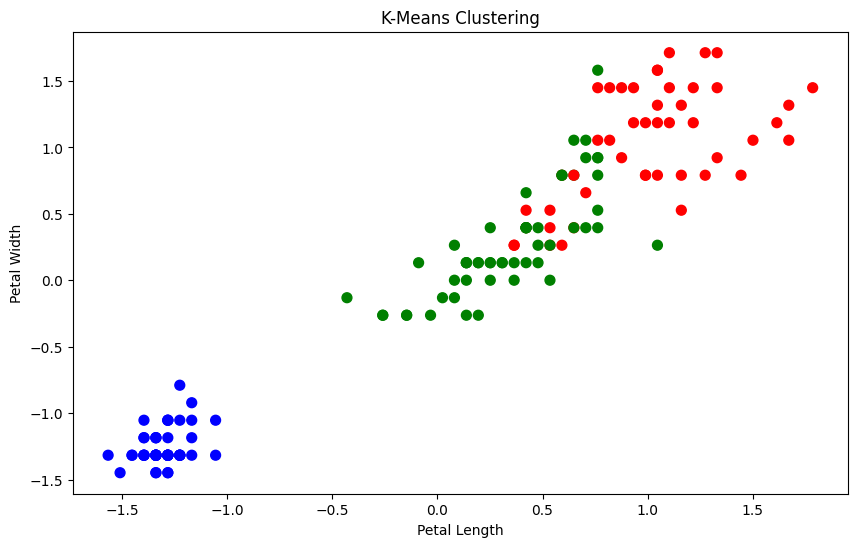

<Figure size 1000x600 with 0 Axes>

In [11]:
#To visualize the clusters created by K-Means and the decision boundaries of the decision tree classifier, you can use the matplotlib library.
import matplotlib.pyplot as plt
import numpy as np

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))

# Create a colormap for the clusters
colormap = np.array(['red', 'blue', 'green'])

# Plot data points with cluster color
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colormap[cluster_labels], s=50)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Visualize Decision Tree Decision Boundaries
plt.figure(figsize=(10, 6))

# Create a meshgrid to plot the decision boundaries
plot_step = 0.01
x_min, x_max = X_scaled[:, 2].min() - 1, X_scaled[:, 2].max() + 1
y_min, y_max = X_scaled[:, 3].min() - 1, X_scaled[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# Predict the class for each mesh point
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries with color overlay
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colormap[y], edgecolors='black', s=50)
plt.title('Decision Tree Decision Boundaries')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


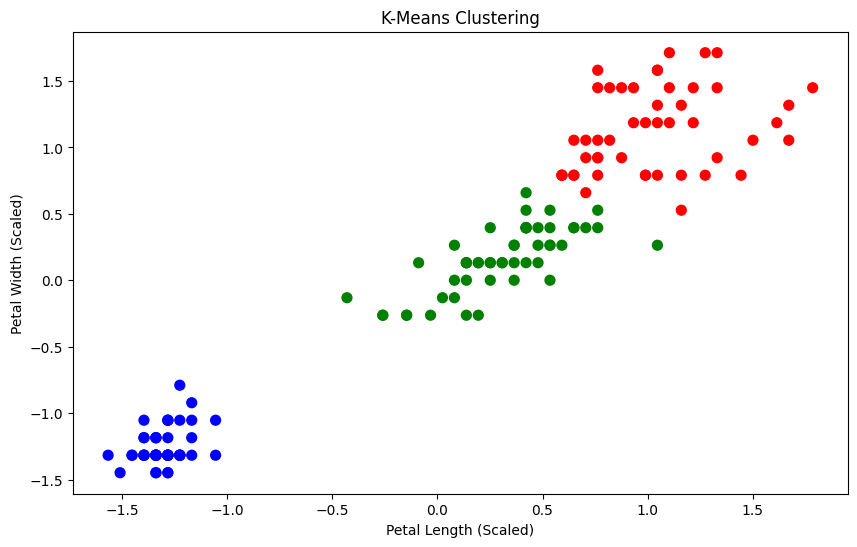

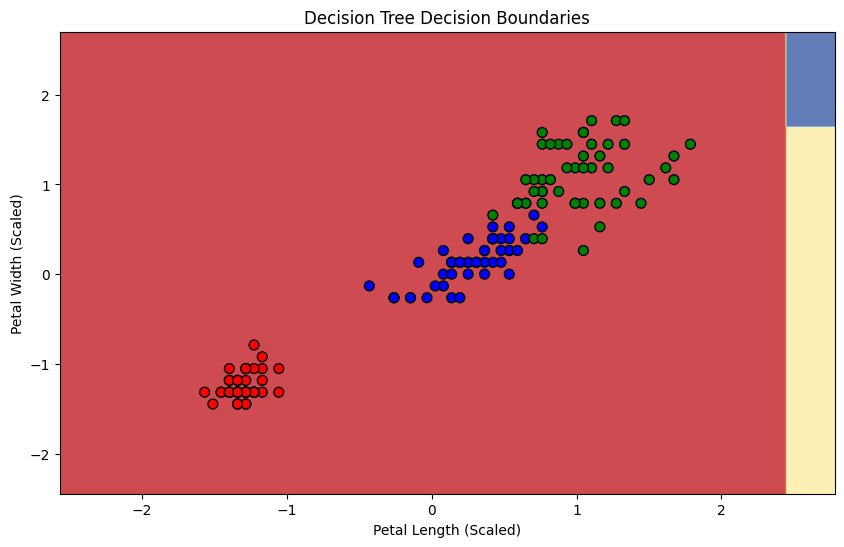

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Select two features for visualization
selected_features = ['petal length (cm)', 'petal width (cm)']
X_selected = X[selected_features]

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_selected, y)

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
colormap = np.array(['red', 'blue', 'green'])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colormap[cluster_labels], s=50)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')

# Visualize Decision Tree Decision Boundaries
plt.figure(figsize=(10, 6))
plot_step = 0.01
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colormap[y], edgecolors='black', s=50)
plt.title('Decision Tree Decision Boundaries')
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')

plt.show()


In [14]:
#Make predictions and calculate accuracy:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


ValueError: ignored